In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

In [18]:
input_file = './data/12.rawdata_weather/CWBUOY'
output_file = './data/22.savedata_weather/CWBUOY_merge.csv'

In [19]:
all_file_list = glob.glob(os.path.join(input_file, 'OBS_CWBUOY_TIM_*'))
print(all_file_list)

['./data/12.rawdata_weather/CWBUOY\\OBS_CWBUOY_TIM_20200619105922.csv', './data/12.rawdata_weather/CWBUOY\\OBS_CWBUOY_TIM_20200619110114.csv', './data/12.rawdata_weather/CWBUOY\\OBS_CWBUOY_TIM_20200619110229.csv', './data/12.rawdata_weather/CWBUOY\\OBS_CWBUOY_TIM_20200619110355.csv']


In [20]:
all_data = []
for file in all_file_list:
    df = pd.read_csv(file, engine='python')
    all_data.append(df)

In [24]:
df_concat = pd.concat(all_data, ignore_index=True)
df_concat.head()

,지점,일시,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)
0,22470,2016-04-01 00:00,6.3,0.1,0.1,0.1,6.6
1,22470,2016-04-01 01:00,6.4,0.2,0.1,0.1,7.1
2,22470,2016-04-01 02:00,6.5,0.2,0.1,0.1,6.6
3,22470,2016-04-01 03:00,6.4,0.1,0.1,0.1,4.3
4,22470,2016-04-01 04:00,6.4,0.2,0.1,0.1,4.2


In [25]:
df_concat.shape

(34306, 7)

In [27]:
df_concat.columns = ['지점', 'MEA_DDHR', 'CWBUOY_WRTM', 'CWBUOY_WH', 'CWBUOY_ATENT_WH', 
                     'CWBUOY_AVG_WH', 'CWBUOY_WVPRD']

In [28]:
df_concat.head()

,지점,MEA_DDHR,CWBUOY_WRTM,CWBUOY_WH,CWBUOY_ATENT_WH,CWBUOY_AVG_WH,CWBUOY_WVPRD
0,22470,2016-04-01 00:00,6.3,0.1,0.1,0.1,6.6
1,22470,2016-04-01 01:00,6.4,0.2,0.1,0.1,7.1
2,22470,2016-04-01 02:00,6.5,0.2,0.1,0.1,6.6
3,22470,2016-04-01 03:00,6.4,0.1,0.1,0.1,4.3
4,22470,2016-04-01 04:00,6.4,0.2,0.1,0.1,4.2


In [29]:
df_concat.isnull().sum()

지점                   0
MEA_DDHR             0
CWBUOY_WRTM        496
CWBUOY_WH           92
CWBUOY_ATENT_WH     91
CWBUOY_AVG_WH       90
CWBUOY_WVPRD       413
dtype: int64

In [30]:
del df_concat['지점']

In [31]:
df_concat.dtypes

MEA_DDHR            object
CWBUOY_WRTM        float64
CWBUOY_WH          float64
CWBUOY_ATENT_WH    float64
CWBUOY_AVG_WH      float64
CWBUOY_WVPRD       float64
dtype: object

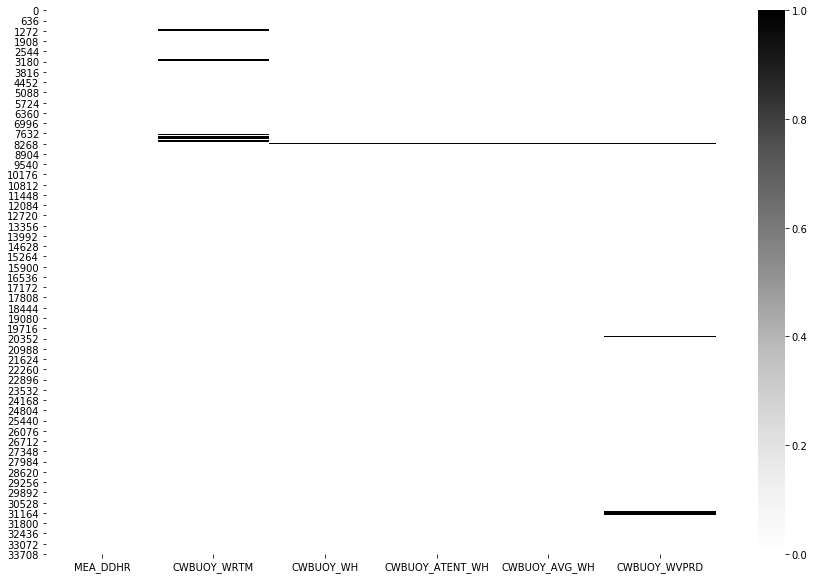

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df_concat.isnull(), cmap="Greys")

In [33]:
df_concat = df_concat.interpolate(method='linear')
df_concat.isnull().sum()

MEA_DDHR           0
CWBUOY_WRTM        0
CWBUOY_WH          0
CWBUOY_ATENT_WH    0
CWBUOY_AVG_WH      0
CWBUOY_WVPRD       0
dtype: int64

In [34]:
df_concat.to_csv(output_file, encoding='utf-8', index=False)

In [36]:
cwbuoy_merge = pd.read_csv('./data/22.savedata_weather/CWBUOY_merge.csv')
cwbuoy_merge.shape

(34306, 6)